<a href="https://colab.research.google.com/github/nidhihegde001/CRISMIS/blob/master/classifier_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [ ]:
import workers

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#increasing the default plot size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
#      torchvision.transforms.RandomHorizontalFlip(p=0.5),
#      torchvision.transforms.RandomVerticalFlip(p=0.5)
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [ ]:
classes = ('Crater', 'Mixed' , 'Space', 'Spots', 'Streaks') # Labels 0-4

In [ ]:
if __name__ == '__main__':
    dataset = torchvision.datasets.ImageFolder(root='data', transform=transform)

In [ ]:
len(dataset)

1452

In [ ]:
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [ ]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
                                          shuffle=True, num_workers=0)

In [ ]:
for a,b in trainloader:
    print(a.shape,b.shape)
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


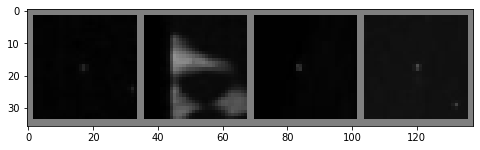

  Spots             Crater             Spots             Spots          


In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('  %5s          ' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 *5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10, 5)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 *5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.softmax(x)
        return x


In [ ]:
print(len(trainloader))

327


### Exp 1

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# # Exp 1 : Trained on CPU with batch size 4
for epoch in range(500):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
torch.save(net.state_dict(), './classifier.pth')

 ### Exp 2

In [ ]:
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Exp 2 : Trained on GPU with batch size 8
for epoch in range(500):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.080
[2,   100] loss: 0.080
[3,   100] loss: 0.080
[4,   100] loss: 0.080
[5,   100] loss: 0.080
[6,   100] loss: 0.080
[7,   100] loss: 0.080
[8,   100] loss: 0.080
[9,   100] loss: 0.079
[10,   100] loss: 0.079
[11,   100] loss: 0.079
[12,   100] loss: 0.078
[13,   100] loss: 0.078
[14,   100] loss: 0.079
[15,   100] loss: 0.078
[16,   100] loss: 0.078
[17,   100] loss: 0.078
[18,   100] loss: 0.078
[19,   100] loss: 0.078
[20,   100] loss: 0.078
[21,   100] loss: 0.079
[22,   100] loss: 0.078
[23,   100] loss: 0.077
[24,   100] loss: 0.078
[25,   100] loss: 0.078
[26,   100] loss: 0.078
[27,   100] loss: 0.078
[28,   100] loss: 0.078
[29,   100] loss: 0.078
[30,   100] loss: 0.078
[31,   100] loss: 0.079
[32,   100] loss: 0.078
[33,   100] loss: 0.078
[34,   100] loss: 0.079
[35,   100] loss: 0.078
[36,   100] loss: 0.078
[37,   100] loss: 0.078
[38,   100] loss: 0.079
[39,   100] loss: 0.078
[40,   100] loss: 0.078
[41,   100] loss: 0.078
[42,   100] loss: 0.078
[

[334,   100] loss: 0.058
[335,   100] loss: 0.058
[336,   100] loss: 0.058
[337,   100] loss: 0.058
[338,   100] loss: 0.058
[339,   100] loss: 0.056
[340,   100] loss: 0.057
[341,   100] loss: 0.058
[342,   100] loss: 0.058
[343,   100] loss: 0.057
[344,   100] loss: 0.058
[345,   100] loss: 0.057
[346,   100] loss: 0.058
[347,   100] loss: 0.058
[348,   100] loss: 0.057
[349,   100] loss: 0.058
[350,   100] loss: 0.057
[351,   100] loss: 0.057
[352,   100] loss: 0.057
[353,   100] loss: 0.057
[354,   100] loss: 0.057
[355,   100] loss: 0.058
[356,   100] loss: 0.057
[357,   100] loss: 0.058
[358,   100] loss: 0.057
[359,   100] loss: 0.057
[360,   100] loss: 0.058
[361,   100] loss: 0.056
[362,   100] loss: 0.057
[363,   100] loss: 0.057
[364,   100] loss: 0.056
[365,   100] loss: 0.057
[366,   100] loss: 0.057
[367,   100] loss: 0.056
[368,   100] loss: 0.058
[369,   100] loss: 0.057
[370,   100] loss: 0.057
[371,   100] loss: 0.056
[372,   100] loss: 0.057
[373,   100] loss: 0.057


In [ ]:
torch.save(net.state_dict(), './classifier_BS8.pth')

## Evaluation

### Exp 1

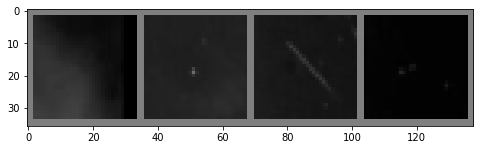

GroundTruth:  Space    Mixed    Streaks    Space   


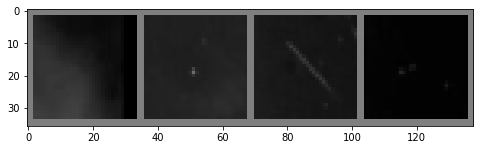

Predicted:  Space    Spots    Streaks    Space   


In [ ]:
exp1 = Net()

exp1.load_state_dict(torch.load('./classifier.pth'))

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                          shuffle=True, num_workers=0)

dataiter = iter(testloader)
images, labels = dataiter.next()
# images_list = []
# labels_list = []
# for i in range(4):
#     image, label = dataiter.next()
#     images_list.append(image.tolist())
#     labels_list.append(label.tolist())
# print(len(images_list))
# images = torch.FloatTensor(images_list)
# labels = torch.Tensor(labels_list, dtype=torch.int8)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s   ' % classes[labels[j]] for j in range(4)))

outputs = exp1(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s   ' % classes[predicted[j]]
                              for j in range(4)))


#### Accuracy on Data

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
with torch.no_grad():
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=1,
                                              shuffle=True, num_workers=0)

In [ ]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    all_labels = torch.tensor([],dtype = torch.int64)
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
        all_labels = torch.cat(
            (all_labels, labels)
            ,dim=0
        )
    return all_preds, all_labels

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
preds,labels = get_all_preds(exp1,data_loader)
cm = confusion_matrix(labels,preds.argmax(dim=1))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in data_loader:
        images, labels = data
        outputs = exp1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of network 1 on %d images: %d %%' % (len(data_loader),
    100 * correct / total))

Accuracy of network 1 on 1452 images: 89 %


In [ ]:
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in data_loader:
        images, labels = data
        outputs = exp1(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
#         print(c.item())
#         print(c.shape)
#         print(predicted)
        for i in range(1):
            label = labels[i]
#             print(label)
            class_correct[label] += c.item()
            class_total[label] += 1
for i in range(5):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Crater : 92 %
Accuracy of Mixed : 75 %
Accuracy of Space : 94 %
Accuracy of Spots : 91 %
Accuracy of Streaks : 94 %


Confusion matrix, without normalization


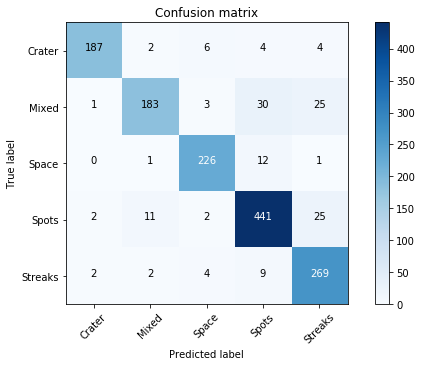

In [ ]:
# Train Data
plot_confusion_matrix(cm,classes)

### Exp 2

#### Accuracy on  Data

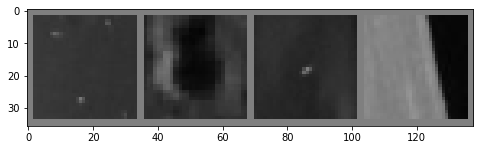

GroundTruth:  Mixed    Crater    Spots    Crater   


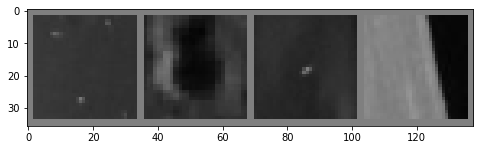

Predicted:  Crater    Crater    Spots    Crater   


In [ ]:
exp2 = Net()
exp2.load_state_dict(torch.load('./classifier_BS8.pth'))

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s   ' % classes[labels[j]] for j in range(4)))

outputs = exp2(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s   ' % classes[predicted[j]]
                              for j in range(4)))


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in data_loader:
        images, labels = data
        outputs = exp2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network 2 on %d images: %d %%' % (len(data_loader),
    100 * correct / total))

Accuracy of the network 2 on 1452 images: 77 %


In [ ]:
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in data_loader:
        images, labels = data
        outputs = exp2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(1):
            label = labels[i]
#             print(label)
            class_correct[label] += c.item()
            class_total[label] += 1
for i in range(5):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Crater : 93 %
Accuracy of Mixed :  0 %
Accuracy of Space : 95 %
Accuracy of Spots : 90 %
Accuracy of Streaks : 96 %


In [ ]:
preds,labels = get_all_preds(exp2,data_loader)
cm2 = confusion_matrix(labels,preds.argmax(dim=1))

Confusion matrix, without normalization


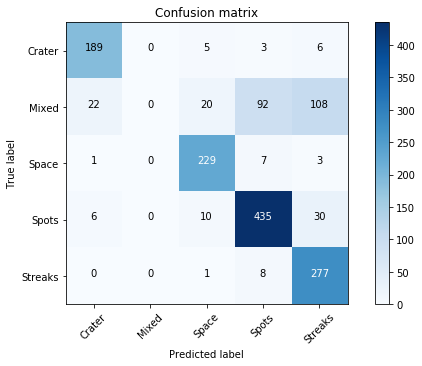

In [ ]:
# Test Data
plot_confusion_matrix(cm2,classes)